<a href="https://colab.research.google.com/github/aishwaryatw/Predicting_Box_Office_Revenue/blob/main/Box_Office_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
train = pd.read_csv('train.csv')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math

In [5]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
nulls= (train.isnull().sum()/train.isnull().count())*100
nulls.sort_values(ascending=False)

belongs_to_collection    79.866667
homepage                 68.466667
tagline                  19.900000
Keywords                  9.200000
production_companies      5.200000
production_countries      1.833333
spoken_languages          0.666667
crew                      0.533333
cast                      0.433333
overview                  0.266667
genres                    0.233333
runtime                   0.066667
poster_path               0.033333
title                     0.000000
status                    0.000000
id                        0.000000
release_date              0.000000
popularity                0.000000
original_title            0.000000
original_language         0.000000
imdb_id                   0.000000
budget                    0.000000
revenue                   0.000000
dtype: float64

# Drop irrelavent columns & columns with more than 50% null values

In [7]:
train.drop(columns=['id','belongs_to_collection','homepage', 'tagline','imdb_id','poster_path'], inplace=True)

In [8]:
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# Fill null values in text columns with 'NA'

In [9]:
train['genres'].fillna('NA', inplace=True)
train['original_language'].fillna('NA',  inplace=True)
train['Keywords'].fillna('NA', inplace=True)
train['production_countries'].fillna('NA', inplace=True)
train['spoken_languages'].fillna('NA', inplace=True)
train['cast'].fillna('NA', inplace=True)
train['crew'].fillna('NA', inplace=True)
train['production_companies'].fillna('NA', inplace=True)




In [10]:
#train['genres']  = train['genres'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['production_countries'] =train['production_countries'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
#train['spoken_languages']= train['spoken_languages'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['cast'] = train['cast'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['crew'] = train['crew'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['production_companies'] =train['production_companies'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)




# Cast column

In [11]:
actor_names=[]

for j in train['cast']:
    if j != 'NA':
        for i in j:
            actor_names.append(i['name'])


In [12]:
actor_names.sort()

# Extract most common actors 

In [13]:
actors_Df=pd.DataFrame(actor_names)
count_actors_movies= actors_Df.groupby(0).size().sort_values(ascending=False)
count_actors_movies
common_actors_list=list(pd.DataFrame(count_actors_movies[count_actors_movies>=10]).index)

In [14]:
count_actors_movies[:10]

0
Samuel L. Jackson    30
Robert De Niro       30
Morgan Freeman       27
Liam Neeson          25
Susan Sarandon       25
Bruce Willis         25
J.K. Simmons         25
Bruce McGill         24
John Turturro        24
Forest Whitaker      23
dtype: int64

In [15]:
len(common_actors_list)

376

# Column with list of actors in each movie

In [16]:
train['list_of_actors']= train['cast'].apply(lambda x: list(pd.DataFrame(x)['name']) if (x != 'NA') and ( x!= [] ) else x)

# New column with actors in common actors list


In [17]:
train['final_actors']= 'Null'

In [18]:
for i in range(len(train)):
    final_actor=[]
    for j in train.loc[i,'list_of_actors']:

            if j in common_actors_list:
                final_actor.append(j)

    train.at[i,'final_actors'] = final_actor

            

In [19]:
train.loc[0:10,['cast','list_of_actors','final_actors']]

,cast,list_of_actors,final_actors
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Adam Scott, John Cusack]"
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[]
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[J.K. Simmons]
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[]
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[]
5,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",[James Earl Jones]
6,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[Jeffrey Dean Morgan, Natasha Calis, Madison D...",[]
7,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[Samir Khader, Josh Rushing, George W. Bush, H...",[]
8,"[{'cast_id': 1, 'character': 'Long John Silver...","[Tim Curry, Kevin Bishop, Jennifer Saunders, B...",[Tim Curry]
9,"[{'cast_id': 24, 'character': 'Jonathan Steinb...","[Bob Balaban, Christopher Guest, John Michael ...","[John Michael Higgins, Eugene Levy, Jane Lynch..."


In [20]:
l=train['final_actors']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [21]:
final_actors = MultiLabelBinarizer()
final_actors = final_actors.fit_transform(train['final_actors'].values)

final_actors_df = pd.DataFrame(final_actors,columns = k)
train = pd.concat([train,final_actors_df],axis = 1)

In [22]:
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime',
       ...
       'Whoopi Goldberg', 'Will Ferrell', 'Willem Dafoe', 'William Fichtner',
       'William H. Macy', 'William Hurt', 'Winona Ryder', 'Woody Allen',
       'Woody Harrelson', 'Zoe Saldana'],
      dtype='object', length=395)

In [23]:
train.loc[0:5,['final_actors']]

,final_actors
0,"[Adam Scott, John Cusack]"
1,[]
2,[J.K. Simmons]
3,[]
4,[]
5,[James Earl Jones]


In [24]:
train.loc[0:5,['cast','list_of_actors','final_actors','John Cusack', 'J.K. Simmons','James Earl Jones']]

,cast,list_of_actors,final_actors,John Cusack,J.K. Simmons,James Earl Jones
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Adam Scott, John Cusack]",1,0,0
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[],0,0,0
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[J.K. Simmons],0,1,0
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[],0,0,0
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],0,0,0
5,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",[James Earl Jones],0,0,1


# Number of cast in each movie

In [25]:
train['num_cast']=train['cast'].apply(lambda x: len(x) )

# Number of crew in each movie

In [26]:
train['num_crew']=train['crew'].apply(lambda x: len(x))

# Production companies column

# Extract list of prod companies

In [27]:
prod_companies=[]
for i in train['production_companies']:
    for j in i:
        if (j != 'N') and (j!= 'A'):
            prod_companies.append(j['name'])
        

In [28]:
prod_companies.sort()


In [29]:
prod_company_Df= pd.DataFrame(prod_companies)
count_production_companies= prod_company_Df.groupby(0).size().sort_values(ascending=False)


In [30]:
count_production_companies[:10]

0
Warner Bros.                              202
Universal Pictures                        188
Paramount Pictures                        161
Twentieth Century Fox Film Corporation    138
Columbia Pictures                          91
Metro-Goldwyn-Mayer (MGM)                  84
New Line Cinema                            75
Touchstone Pictures                        63
Walt Disney Pictures                       62
Columbia Pictures Corporation              61
dtype: int64

# List of production companies that produced more than 10 movies


In [31]:
common_prod_companies= list(count_production_companies[count_production_companies > 10].index)
len(common_prod_companies)

69

# Create list of production companies column


In [32]:
train['list_of_prod_companies']= train['production_companies'].apply(lambda x: list(pd.DataFrame(x)['name']) if (x != 'NA') and ( x!= [] ) else x)

# List of top prod companies , create new column with prod companies who produced more than 10 movies and print null for others

In [33]:
train['final_companies']='Null'

In [34]:
for i in range(len(train)):
    final_prod_companies=[]
    for j in train.loc[i,'list_of_prod_companies']:
            if j in common_prod_companies:
                final_prod_companies.append(j)
    train.at[i,'final_companies'] = final_prod_companies

            

In [35]:
l=train['final_companies']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy variables

In [36]:
prod_companies = MultiLabelBinarizer()
prod_companies = prod_companies.fit_transform(train['final_companies'].values)

prod_companies_df = pd.DataFrame(prod_companies,columns = k)
train = pd.concat([train,prod_companies_df],axis = 1)

# Extract common directors list

In [37]:
directors=[]
for i in train['crew']:
    if i != 'NA':
        for j in i:
            if (j['department'] =='Directing') & (j['job']=='Director'):
                
                directors.append(j['name'])

In [38]:
directors.sort()


# Consider directors that have directed more than 6 movies, make it a categorical column


In [39]:
direct_Df=pd.DataFrame(directors)

count_director_movies= direct_Df.groupby(0).size().sort_values(ascending=False)
#count_director_movies
common_directors_list=list(count_director_movies[count_director_movies >= 6].index)
len(common_directors_list)

36

In [40]:
count_director_movies[:10]

0
Ron Howard              11
Clint Eastwood          11
Steven Spielberg        10
Blake Edwards            9
Woody Allen              9
Steven Soderbergh        8
Francis Ford Coppola     8
Wes Craven               8
Brian De Palma           8
Paul W.S. Anderson       8
dtype: int64

# Column with director names

In [41]:
director = pd.DataFrame(columns=['list_of_directors'])
director

,list_of_directors


# List of director names in a new column

In [42]:
for j in range(len(train['crew'])):
    if (train['crew'][j] != 'NA') and (train['crew'][j]!= []):
        a= pd.DataFrame(train['crew'][j])
        directors=[]
        for i in range(len(a)):
            #print(a['name'])
            if (a.loc[i,'job']=='Director') & (a.loc[i,'department']=='Directing') :
                directors.append(a.loc[i,'name'])
        director.loc[j,'list_of_directors']= directors



    else:
        director.loc[j,'list_of_directors']='NA'        

In [43]:
train= pd.concat([train,director], axis=1)

# List of top directors , create new column wih directors who produced more than 6 movies and print null for others


In [44]:
train['final_director']='Null'

In [45]:
a= list(train.columns)

In [46]:
a.sort()

In [47]:
a

['Aaron Eckhart',
 'Adam Sandler',
 'Adam Scott',
 'Al Pacino',
 'Alec Baldwin',
 'Alfred Molina',
 'Allison Janney',
 'Amanda Peet',
 'Amblin Entertainment',
 'American Zoetrope',
 'Amy Adams',
 'Andy Serkis',
 'Angela Bassett',
 'Anjelica Huston',
 'Anna Kendrick',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Antonio Banderas',
 'Arnold Schwarzenegger',
 'Ashley Judd',
 'BBC Films',
 'Barry Pepper',
 'Ben Affleck',
 'Ben Kingsley',
 'Ben Stiller',
 'Benicio del Toro',
 'Beth Grant',
 'Bette Midler',
 'Bill Hader',
 'Bill Murray',
 'Bill Nighy',
 'Bill Paxton',
 'Bill Pullman',
 'Billy Bob Thornton',
 'Billy Burke',
 'Blumhouse Productions',
 'Bob Gunton',
 'Bobby Cannavale',
 'Brad Dourif',
 'Brad Pitt',
 'Bradley Cooper',
 'Bradley Whitford',
 'Brendan Gleeson',
 'Brian Cox',
 'Brian Dennehy',
 'Brion James',
 'Bruce Campbell',
 'Bruce Greenwood',
 'Bruce McGill',
 'Bruce Willis',
 'Burt Kwouk',
 'Cameron Diaz',
 'Canal+',
 'Canal+ España',
 'Carla Gugino',
 'Carolco Pictures',
 'Cary E

In [48]:
for i in range(len(train)):
    final_director=[]
    for j in train.loc[i,'list_of_directors']:
            if j in common_directors_list:
                final_director.append(j)
    train.at[i,'final_director'] = final_director

            

In [49]:
train.loc[0:5,['crew','list_of_directors','final_director']]

,crew,list_of_directors,final_director
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Steve Pink],[]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",[Garry Marshall],[Garry Marshall]
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",[Damien Chazelle],[]
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh],[]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[Jong-seok Yoon],[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[Hal Sutherland],[]


In [50]:
l=train['final_director']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy Variables

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
directors_lb = MultiLabelBinarizer()

In [52]:
X = directors_lb.fit_transform(train['final_director'].values)


In [53]:
X_Df= pd.DataFrame(X, columns=k)

In [54]:
train= pd.concat([train, X_Df], axis=1)

# Producers`

# Extract common directors list

In [55]:
producers=[]
for i in train['crew']:
    if i != 'NA':
        for j in i:
            if (j['department'] =='Production') & (j['job']=='Producer'):
                
                producers.append(j['name'])

In [56]:
producers.sort()


# Consider producers that have produced more than 10 movies, make it a categorical column


# Column with producer names

In [57]:
producers_Df=pd.DataFrame(producers)

count_producers_movies= producers_Df.groupby(0).size().sort_values(ascending=False)
#count_director_movies
common_producers_list=list(count_producers_movies[count_producers_movies >= 8].index)
len(common_producers_list)

61

In [58]:
producer = pd.DataFrame(columns=['list_of_producers'])
producer

,list_of_producers


In [59]:
for j in range(len(train['crew'])):
    if (train['crew'][j] != 'NA') and (train['crew'][j]!= []):
        a= pd.DataFrame(train['crew'][j])
        producers=[]
        for i in range(len(a)):
            #print(a['name'])
            if (a.loc[i,'job']=='Producer') & (a.loc[i,'department']=='Production'):
                producers.append(a.loc[i,'name'])
        producer.loc[j,'list_of_producers']= producers



    else:
        producer.loc[j,'list_of_producers']='NA'        

In [60]:
train= pd.concat([train,producer], axis=1)

In [61]:
train.loc[0:5,['crew','list_of_producers']]

,crew,list_of_producers
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Andrew Panay]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[Whitney Houston, Mario Iscovich, Debra Martin..."
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[David Lancaster, Michel Litvak, Jason Blum, H..."
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[]


In [62]:
train.drop(columns='Clint Eastwood', inplace=True)

# List of top producers , create new column wih directors who produced more than 10 movies and print null for others


In [63]:
train.drop(columns='Woody Allen', inplace=True)

In [64]:
train['final_producer']='Null'

In [65]:
for i in range(len(train)):
    final_producer=[]
    for j in train.loc[i,'list_of_producers']:
            if j in common_producers_list:
                final_producer.append(j)
    train.at[i,'final_producer'] = final_producer

            

In [66]:
train.loc[0:5,['crew','list_of_producers','final_producer']]

,crew,list_of_producers,final_producer
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Andrew Panay],[]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[Whitney Houston, Mario Iscovich, Debra Martin...",[]
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[David Lancaster, Michel Litvak, Jason Blum, H...",[Jason Blum]
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh],[]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[],[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[],[]


# Dummy variables

In [67]:
len(common_producers_list)

61

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
producers_lb = MultiLabelBinarizer()

In [69]:
X = producers_lb.fit_transform(train['final_producer'].values)


In [70]:
l=train['final_producer']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [71]:
X_Df= pd.DataFrame(X, columns= k)

In [72]:
train= pd.concat([train, X_Df], axis=1)

In [73]:
b= list(train.columns)

In [74]:
b.sort()

# Drop dummy variables for few actors and directors that have same names and have created duplicate dummy variables

In [75]:
train= train.drop(columns=['Ivan Reitman', 'Luc Besson', 'Ridley Scott', 'Robert De Niro','Ron Howard'], axis=1)

# Genres column

In [76]:
a= list(train.columns)

In [77]:
set([x for x in a if a.count(x) > 1])


{'Brad Pitt', 'Michael Mann', 'Peter Jackson', 'Steven Spielberg'}

In [78]:
train.drop(columns=['Brad Pitt','Michael Mann','Peter Jackson','Steven Spielberg'], inplace=True)

In [79]:
for i in range(len(train)):
    if train['genres'][i]!='NA':
    
        t=ast.literal_eval(train['genres'][i])
        l=len(t)
        m = []
        for j in range(l):
            x=ast.literal_eval(train['genres'][i])[j]
            m.append(x['name'])
            train.at[i,'genres_list'] = m
            print(i)
    else:
        pass

Streaming output truncated to the last 5000 lines.
1007
1008
1008
1008
1009
1009
1009
1009
1009
1010
1011
1011
1012
1012
1012
1013
1014
1014
1014
1014
1015
1015
1015
1016
1016
1016
1017
1017
1017
1018
1018
1018
1019
1019
1019
1020
1021
1021
1021
1022
1023
1023
1023
1023
1024
1025
1025
1026
1026
1027
1028
1028
1028
1029
1029
1029
1030
1030
1031
1031
1031
1032
1032
1032
1032
1033
1034
1034
1035
1036
1037
1037
1037
1038
1038
1038
1038
1039
1039
1040
1040
1041
1041
1041
1041
1041
1042
1042
1042
1042
1043
1043
1044
1044
1044
1045
1045
1045
1045
1045
1046
1046
1047
1047
1047
1047
1047
1048
1049
1049
1049
1050
1050
1050
1050
1050
1051
1051
1052
1052
1052
1053
1054
1054
1054
1055
1055
1055
1055
1056
1056
1056
1057
1057
1058
1058
1058
1059
1059
1059
1060
1060
1061
1061
1062
1062
1063
1063
1063
1064
1064
1064
1064
1064
1065
1065
1066
1066
1066
1067
1067
1067
1067
1068
1068
1069
1070
1070
1070
1071
1071
1072
1072
1073
1073
1073
1074
1075
1075
1076
1077
1077
1077
1078
1078
1078
1079
1080
1080
1080

In [80]:
train['genres_list'].fillna('NA', inplace=True)

In [81]:
l=train['genres_list']
m=[]
for i in range(len(l)):
    for j in l[i]:
        m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [82]:
genre = MultiLabelBinarizer()
genre_dummy = genre.fit_transform(train['genres_list'].values)

genre_dummy = pd.DataFrame(genre_dummy,columns = k)


In [83]:
genre_dummy.drop(columns=['A','N'], inplace=True)

In [84]:
train = pd.concat([train,genre_dummy],axis = 1)

# Spoken languages column

In [85]:
train['spoken_languages'].fillna('NA',inplace=True)
train['languages_list']='NA'

# Create column containing list of languages

In [86]:
for i in range(len(train)):
    if train['spoken_languages'][i]!='NA':
    
        t=ast.literal_eval(train['spoken_languages'][i])
        l=len(t)
        m = []
        for j in range(l):
            x=ast.literal_eval(train['spoken_languages'][i])[j]
            m.append(x['name'])
            #print(m)
            #print(i)
            train.at[i,'languages_list'] = m
            #print(train.at[i,'languages_list'])
            
    else:
        pass

In [87]:
train['num_languages']= train['languages_list'].apply(lambda x: len(x))

In [88]:
l=train['languages_list']
m=[]
for i in range(len(l)):
    for j in l[i]:
        m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy variables for languages

In [89]:
languages = MultiLabelBinarizer()
languages_dummy = genre.fit_transform(train['languages_list'].values)

languages_dummy = pd.DataFrame(languages_dummy,columns = k)
train = pd.concat([train,languages_dummy],axis = 1)

In [90]:
train.drop(columns='A', inplace=True)

# Overview column

In [91]:
import numpy as np

In [92]:
# TFIDF for Overview
from sklearn.feature_extraction.text import TfidfVectorizer
vect_word = TfidfVectorizer(max_features=2500, analyzer='word', stop_words='english', ngram_range=(1,3), dtype=np.float32) 
x = vect_word.fit_transform(train['overview'].values.astype('U'))


tfidf = dict(zip(vect_word.get_feature_names(), vect_word.idf_))
tfidf = pd.DataFrame(columns=['title_word_tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['title_word_tfidf']

y=tfidf.sort_values(by=['title_word_tfidf'], ascending=False)

z=y.to_dict()
r=z['title_word_tfidf']

m = []
train['overview'].fillna('NAN',inplace = True)
for i in range(len(train)):
    d = 0
    t=pd.DataFrame(train['overview']).iloc[i,:].str.split(' ')
    u = t.to_list()
    u = u[0]
    for j in u :
        if j in r.keys():
            d= d + r.get(j)
        else:
             pass
    d=d/len(u)
    m.append(d)       
train['overview_vector'] = pd.DataFrame(m)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [93]:
train.drop(columns='overview', inplace=True)

In [94]:
train.drop(columns=['final_actors','final_companies','final_director','final_producer','genres','genres_list','languages_list','list_of_actors','list_of_directors','list_of_prod_companies','list_of_producers'], inplace=True)

# Replace budget values less than 600 with median

In [95]:
train.loc[train['budget']<600,'budget']=train['budget'].median()

# Normalize budget

In [96]:
from sklearn.preprocessing import normalize
budget_norm=train['budget']/(np.linalg.norm(train['budget']))

In [97]:
normalized_budget=pd.DataFrame(budget_norm)

In [98]:
normalized_budget.rename(columns={'budget':'normalized_budget'}, inplace=True)

In [99]:
train= pd.concat([train,normalized_budget], axis=1)

# Replace runtime with median

In [101]:
train['runtime'].fillna(train['runtime'].median(),inplace=True)

# Normalize runtime

In [102]:
from sklearn.preprocessing import normalize
runtime_norm=(train['runtime'])/(np.linalg.norm(train['runtime']))

In [103]:
normalized_runtime=pd.DataFrame(runtime_norm)

In [104]:
normalized_runtime.rename(columns={'runtime':'normalized_runtime'}, inplace=True)

In [105]:
train= pd.concat([train,normalized_runtime], axis=1)

# Drop rows with revenue < 10000

In [106]:
Low_revenue_count = (train.loc[train['revenue']<10000,'revenue'].index)

In [107]:
train.drop(Low_revenue_count,inplace = True)

In [108]:
train.shape

(2908, 624)

# Revenue column is skewed and hence we take its log

In [109]:
import matplotlib.pyplot as plt

(array([2.54e+03, 2.18e+02, 7.90e+01, 2.40e+01, 1.80e+01, 1.20e+01,
        1.10e+01, 2.00e+00, 1.00e+00, 3.00e+00]),
 array([1.00180000e+04, 1.51964807e+08, 3.03919596e+08, 4.55874386e+08,
        6.07829175e+08, 7.59783964e+08, 9.11738753e+08, 1.06369354e+09,
        1.21564833e+09, 1.36760312e+09, 1.51955791e+09]),
 <BarContainer object of 10 artists>)

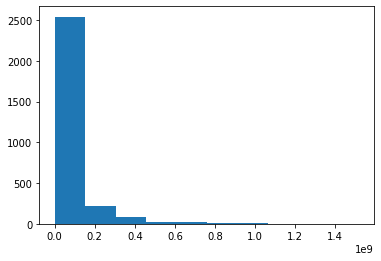

In [110]:
plt.hist(train['revenue'])

In [111]:
import numpy as np
train['log_revenue']=np.log1p(train['revenue'])

# Release month dummy variables

In [112]:
t= pd.to_datetime(train['release_date'])
train['Month'] = t.dt.month

In [113]:
from sklearn.preprocessing import OneHotEncoder
train= pd.get_dummies(train, columns=['Month'])


# Splitting data 

In [114]:
# Drop unnecessary columns

In [115]:
train.drop(columns='revenue',inplace=True)
train.drop(columns='budget', inplace=True)
train.drop(columns='runtime', inplace=True)

In [116]:
train.drop(columns=['original_language','original_title','popularity','production_companies','production_countries','spoken_languages',
                   'status','title','Keywords','cast','crew'], inplace=True)

In [117]:
t= pd.to_datetime(train['release_date'])
train['Year'] = t.dt.year

In [118]:
train.drop(columns='release_date', inplace=True)

In [119]:
train.drop(columns=['','N'], inplace=True)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,train['log_revenue'],test_size=0.20,random_state=42)

In [121]:
X_train.drop(columns = 'log_revenue',inplace = True)
X_test.drop(columns = 'log_revenue',inplace = True)

# Scaling X_train,X_test

In [122]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()

In [123]:
X_test_scaled=Sc_x.fit_transform(X_test)
X_train_scaled=Sc_x.fit_transform(X_train)

In [124]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)

In [125]:
rf.fit(X_train_scaled,Y_train)

RandomForestRegressor(n_estimators=1000, random_state=100)

In [126]:
from sklearn.metrics import mean_squared_error

pred_RF = rf.predict(X_test_scaled)

test_set_rmse = (np.sqrt(mean_squared_error(Y_test, pred_RF)))
test_set_rmse

1.5840517723305279

In [128]:
train.to_csv('Pred_results.csv')